In [4]:
import requests
import json
import datetime
from datetime import date
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd 

In [6]:
start = "2010-01-01"
end = date.today().strftime("%Y-%m-%d")

def loadData(ticker, startTime, endTime): 
    data = yf.download(ticker, startTime, endTime) 
    data.reset_index(inplace=True)
    return data

In [13]:
# Download historical data for Microsoft
df = loadData("MSFT", start, end) 
df = df.drop(['Date'], axis = 1)

# Check the first few rows
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price       Close       High        Low       Open    Volume
Ticker       MSFT       MSFT       MSFT       MSFT      MSFT
0       23.211439  23.323934  22.941451  22.963951  38409100
1       23.218935  23.323931  22.978946  23.136440  49749600
2       23.076450  23.308939  22.888959  23.158946  58182400
3       22.836456  23.023948  22.641465  22.971449  50559700
4       22.993952  23.158944  22.678966  22.708965  51197400



/var/folders/qp/4406nzfn16jd4z9wk1lj99_h0000gn/T/ipykernel_81452/3084047648.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


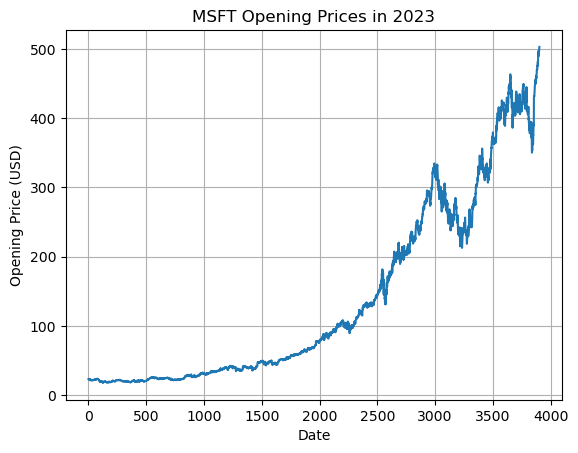

In [8]:
# Plot the opening price
plt.plot(data.index, data['Open'])
plt.title("MSFT Opening Prices in 2023")
plt.xlabel("Date")
plt.ylabel("Opening Price (USD)")
plt.grid(True)
plt.show()

In [14]:
df

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
0,23.211439,23.323934,22.941451,22.963951,38409100
1,23.218935,23.323931,22.978946,23.136440,49749600
2,23.076450,23.308939,22.888959,23.158946,58182400
3,22.836456,23.023948,22.641465,22.971449,50559700
4,22.993952,23.158944,22.678966,22.708965,51197400
...,...,...,...,...,...
3898,498.839996,500.130005,493.440002,493.809998,13984800
3899,497.720001,498.750000,495.230011,497.380005,13981600
3900,496.619995,498.200012,494.109985,497.239990,11846600


In [31]:
import numpy as np
import math 
import tensorflow as tf
import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# How to train lstm 
## Compile data 
- insert data into np array
    - reshape np array (turn 1D array into 2D array)
- split the data into sequence
```
[10, 20, 30, 40, 50, 60, 70, 80, 90]
X,		        y
10, 20, 30		40
20, 30, 40		50
30, 40, 50		60
```
- normalise data
- split data into test set and training set
- reshape input to be [samples, time steps, features]


In [32]:

movAve100 = df.Close.rolling(100).mean()
movAve200 = df.Close.rolling(200).mean()

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

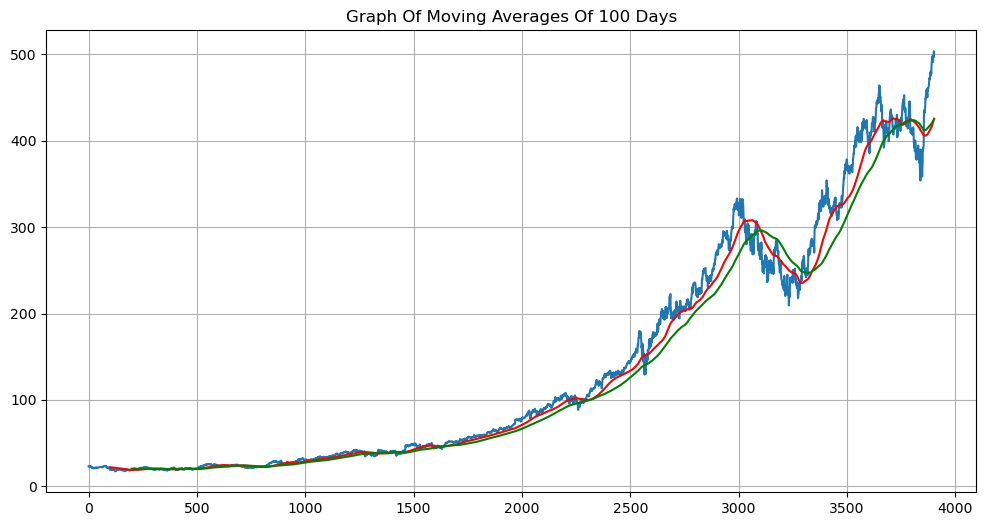

In [33]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(movAve100, 'r')
plt.plot(movAve200, 'g')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [70]:
# Insert data into np array 
openArr = data['Close'].values 

# reshape data into 2D array 
openArr = np.reshape(openArr, (-1, 1))
# reshape(array , (row, column))
scaler = MinMaxScaler(feature_range=(0, 1))
openArr = scaler.fit_transform(openArr)

# Split data into test set and training set 
trainSize = int(len(openArr) * 0.5)
testSize = len(openArr) - trainSize 
trainSet, testSet = openArr[0: trainSize], openArr[trainSize: len(openArr)]

In [35]:
# split data function 
def splitSequence(sequence, steps):
    x, y = [],[]
    for i in range(len(sequence) - steps - 1): 
        end = i + steps
        x.append(sequence[i:end])
        y.append(sequence[end])
    return np.array(x), np.array(y)
    

In [100]:
lookBack = 100
trainX ,trainY = splitSequence(trainSet, lookBack)
testX, testY = splitSequence(testSet, lookBack)

In [101]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# reshape(array , (samples, timesteps, features))
print(trainX.shape)
print(trainY.shape)

(1850, 100, 1)
(1850, 1)


## Training the model 


In [102]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [104]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (trainX.shape[1], 1)))
model.add(Dropout(0.2))


model.add(Dense(units = 1))


In [105]:
# training the model 
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(trainX, trainY, epochs=100, batch_size=lookBack, verbose=1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0013 - mean_absolute_error: 0.0265 
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.0019e-04 - mean_absolute_error: 0.0182
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0130e-04 - mean_absolute_error: 0.0139
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.2834e-04 - mean_absolute_error: 0.0082
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.1172e-04 - mean_absolute_error: 0.0076
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.7156e-05 - mean_absolute_error: 0.0071
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.1303e-05 - mean_absolute_error: 0.0069
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.5965e-05 - mean_absolute_error: 0.0067
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.6530e-05 - mean_absolute_error: 0.0067
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.0190e-05 - mean_absolute_error:

In [98]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(1860, 90, 1)


In [83]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 90, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 90, 1)          │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

## Testing Model 
### Prep data to run model 
1. split data into 70/30 - train/test
2. take past 100 days data from train batch turn to dataframe 
3. test data into dataFrame
4. concat past 100 days and and test data into final frame
5. scale final frame 
6. split scaled frame into x, y
### Running model 
1. run predict on x
2. multiply by scale factor
3. plot the data 

In [109]:
df.head()
train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])
trainClose = train.iloc[:, 4:5].values
testClose = test.iloc[:, 4:5].values

In [110]:
past100Days = pd.DataFrame(trainClose[-100:])
testDF = pd.DataFrame(testClose)

finalDF = pd.concat([past100Days, testDF], ignore_index=True)

In [121]:
arr = finalDF.to_numpy()
arr = np.reshape(arr, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
arr = scaler.fit_transform(arr)

In [125]:
xTest, yTest = splitSequence(arr, 100)

In [129]:
print(xTest.shape)
print(yTest.shape)

(1170, 100, 1)
(1170, 1)


In [130]:
yPred = model.predict(xTest)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [127]:
yPred

array([[[1.9423664e-02],
        [1.5171146e-02],
        [1.0326814e-02],
        ...,
        [4.5348242e-02],
        [5.5051323e-02],
        [6.3325405e-02]],

       [[2.5654849e-02],
        [1.7952666e-02],
        [1.8673342e-02],
        ...,
        [5.5051323e-02],
        [6.3325405e-02],
        [7.1652874e-02]],

       [[2.1821000e-02],
        [2.2234738e-02],
        [2.2017116e-02],
        ...,
        [6.3325405e-02],
        [7.1652874e-02],
        [7.0719592e-02]],

       ...,

       [[1.9022010e-01],
        [3.3530450e-01],
        [4.6058506e-01],
        ...,
        [2.9472403e+02],
        [3.8443912e+02],
        [5.1744794e+02]],

       [[1.8721636e-01],
        [3.3064264e-01],
        [4.5622498e-01],
        ...,
        [3.3555911e+02],
        [4.5269418e+02],
        [5.5378131e+02]],

       [[1.8542813e-01],
        [3.2884830e-01],
        [4.5526838e-01],
        ...,
        [3.9574600e+02],
        [5.2825775e+02],
        [6.3280157e+02]]

In [128]:
yPred.shape

(1170, 100, 1)